In [49]:
import numpy as np    #importing libraries
import pandas as pd

from sklearn.model_selection import train_test_split     #importing sklearn packages
from sklearn_pandas import DataFrameMapper    
import sklearn.preprocessing
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import functools     #importing libraries to process data
import xgboost
from xgboost import XGBClassifier
import matplotlib as plt     #importing matplotlib
import matplotlib.pyplot as pplt
%matplotlib inline
import seaborn as sns    #importing seaborn library

In [50]:
#importing train data
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

#importing test data
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [51]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels    #setting column names 
test_set.columns = col_labels

In [52]:
train_set.head()    #displaying train set top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
test_set.head()    #displaying test set top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [54]:
train_set.shape    #shape of train set

(32561, 15)

In [55]:
test_set.shape    #shape of test set

(16281, 15)

In [56]:
train_set.workclass.value_counts()    #all values of workclass column

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [57]:
train_set.education.value_counts()    #all values of education column

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [58]:
train_set.native_country.value_counts()      #all values of country column

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [59]:
occupation_set = set(train_set['occupation'])    #unique categories in occupation
print(occupation_set)

{' Machine-op-inspct', ' Priv-house-serv', ' ?', ' Tech-support', ' Adm-clerical', ' Protective-serv', ' Sales', ' Handlers-cleaners', ' Prof-specialty', ' Craft-repair', ' Armed-Forces', ' Transport-moving', ' Exec-managerial', ' Other-service', ' Farming-fishing'}


In [60]:
#classifying them as numbers in train set
train_set['occupation'] = train_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [61]:
#classifying them as numbers in test set
test_set['occupation'] = test_set['occupation'].map({' ?': 0, ' Farming-fishing': 1, ' Tech-support': 2, 
                                                       ' Adm-clerical': 3, ' Handlers-cleaners': 4, ' Prof-specialty': 5,
                                                       ' Machine-op-inspct': 6, ' Exec-managerial': 7, 
                                                       ' Priv-house-serv': 8, ' Craft-repair': 9, ' Sales': 10, 
                                                       ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13, 
                                                       ' Protective-serv': 14}).astype(int)

In [62]:
test_set.head()    #displaying test set top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,6,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,1,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,14,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,6,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States,<=50K.


In [63]:
train_set.head()    #displaying train set top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,3,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,7,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,4,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,4,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,5,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
#mapping wage_class into integer column in train set
train_set['wage_class'] = train_set['wage_class'].map({' <=50K': 0, ' >50K': 1}).astype(int)

In [65]:
#mapping wage_class into integer column in test set
test_set['wage_class'] = test_set['wage_class'].map({' <=50K.': 0, ' >50K.': 1}).astype(int)

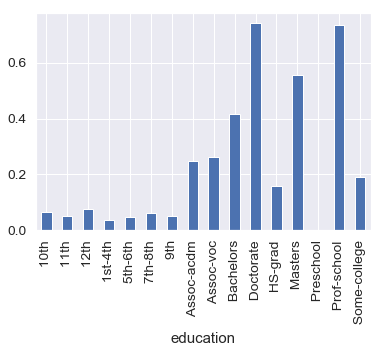

In [66]:
#plotting graph between wage_class & education 
train_set.groupby('education')['wage_class'].mean().plot(kind='bar')

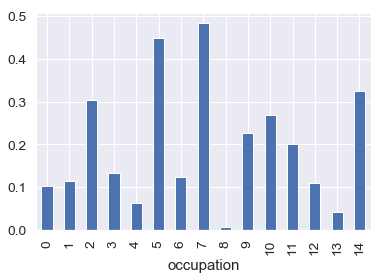

In [67]:
#plotting graph between wage_class & occupation 
train_set.groupby('occupation')['wage_class'].mean().plot(kind='bar')

In [68]:
train_set['sex'] = train_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)     #changing Sex into 0 & 1
test_set['sex'] = test_set['sex'].map({' Male': 0, ' Female': 1}).astype(int)    #changing Sex into 0 & 1

In [69]:
race_set = set(train_set['race'])    #unique races
print(race_set)

{' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' White', ' Other'}


In [70]:
#mapping races to integer values in train dataset
train_set['race'] = train_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)
#mapping races to integer values in test dataset
test_set['race'] = test_set['race'].map({' Black': 0, ' Asian-Pac-Islander': 1, ' Other': 2, ' White': 3, 
                                             ' Amer-Indian-Eskimo': 4}).astype(int)

In [71]:
mstatus_set = set(train_set['marital_status'])    #unique marital statuses
print(mstatus_set)

{' Widowed', ' Separated', ' Married-civ-spouse', ' Divorced', ' Married-spouse-absent', ' Never-married', ' Married-AF-spouse'}


In [72]:
#mapping maritial status to integer values in train dataset
train_set['marital_status'] = train_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)
#mapping maritial status to integer values in test dataset
test_set['marital_status'] = test_set['marital_status'].map({' Married-spouse-absent': 0, ' Widowed': 1, 
                                                             ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4, 
                                                             ' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [73]:
train_set.head()    #displaying train set top 5 records

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,5,3,Not-in-family,3,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,2,7,Husband,3,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,4,4,Not-in-family,3,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,2,4,Husband,0,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,2,5,Wife,0,1,0,0,40,Cuba,0


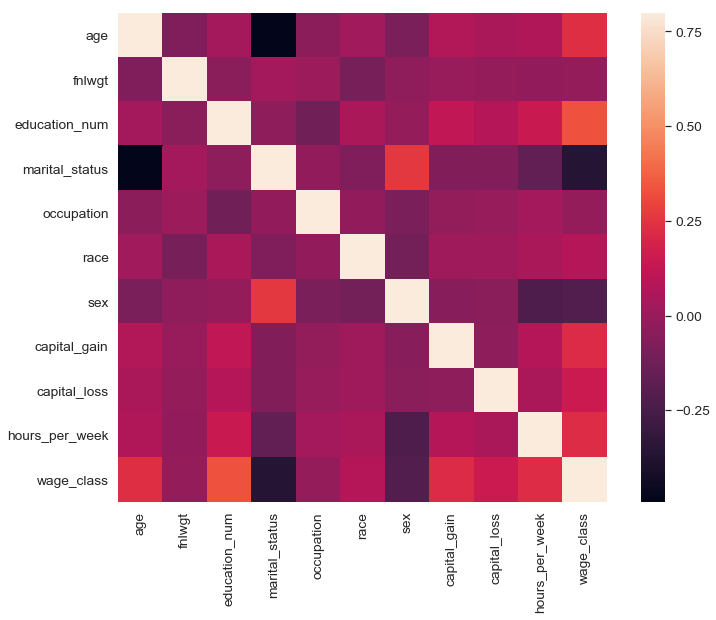

In [74]:
corrmat = train_set.corr()      #correlation matrix
f, ax = pplt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

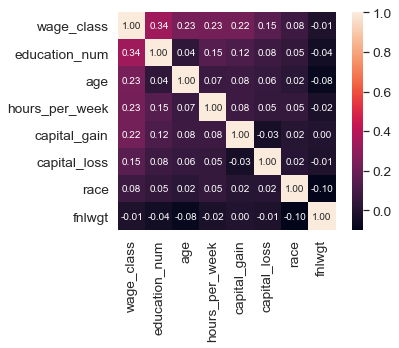

In [75]:
k = 8     #number of variables for heatmap
cols = corrmat.nlargest(k, 'wage_class')['wage_class'].index
cm = np.corrcoef(train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
pplt.show()

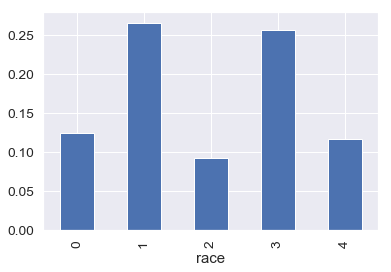

In [76]:
train_set.groupby('race')['wage_class'].mean().plot(kind='bar')    #plotting income classified by race

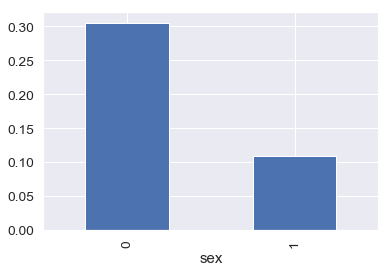

In [77]:
train_set.groupby('sex')['wage_class'].mean().plot(kind='bar')    #plotting income classified by sex

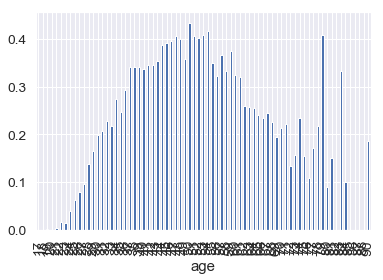

In [78]:
train_set.groupby('age')['wage_class'].mean().plot(kind='bar')     #plotting income classified by age

In [79]:
"""
Conclusion:
We have explored data & came to know that

1.Income follows normal deviation approximately, with a peak at 50 years old.
2.Men have more chances of higher income.
3.White & Asian Pacific Islanders have more chances than other races.

"""

'\nConclusion:\nWe have explored data & came to know that\n\n1.Income follows normal deviation approximately, with a peak at 50 years old.\n2.Men have more chances of higher income.\n3.White & Asian Pacific Islanders have more chances than other races.\n\n'

In [80]:
X_train = train_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]   #considering important features
Y_train = train_set['wage_class']     #label income
X_test = test_set[['education_num', 'age', 'hours_per_week', 'capital_gain']]     #considering important features
Y_test = test_set['wage_class']      #label income

In [81]:
classifier = XGBClassifier()    #instance of XGBoost classifier
classifier.fit(X_train,Y_train)    #fitting data into model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [82]:
Y_pred = classifier.predict(X_test)     #predicting output of test set from trained model

In [83]:
cm = confusion_matrix(Y_test,Y_pred)     #confusion matrix
print(cm)

[[11934   501]
 [ 2274  1572]]


In [84]:
#getting accuracies-set from cross validation test
accuracies = cross_val_score(estimator=classifier,X = X_train,y = Y_train,cv = 10)

In [88]:
accuracies.mean()    #mean of accuracies

0.8291517928875928

In [89]:
accuracies.std()    #standard deviation of accuracies

0.006337788569732528